# Carregando a Base de Dados

In [1]:
import pandas as pd
import sqlite3

con = sqlite3.connect("database.sqlite3")
df = pd.read_sql_query("SELECT * from vendas", con)

con.close()

# Verificando tipo das variáveis e quantidade de valores válidos.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52094 entries, 0 to 52093
Data columns (total 14 columns):
COD_MATERIAL              52094 non-null int64
COD_CICLO                 52094 non-null int64
DES_CATEGORIA_MATERIAL    52094 non-null object
DES_MARCA_MATERIAL        52094 non-null object
FLG_DATA                  52094 non-null int64
FLG_CAMPANHA_MKT_A        52094 non-null float64
FLG_CAMPANHA_MKT_B        52094 non-null float64
FLG_CAMPANHA_MKT_C        52094 non-null float64
FLG_CAMPANHA_MKT_D        52094 non-null float64
FLG_CAMPANHA_MKT_E        52094 non-null float64
FLG_CAMPANHA_MKT_F        52094 non-null float64
PCT_DESCONTO              16780 non-null float64
VL_PRECO                  52088 non-null float64
QT_VENDA                  48946 non-null float64
dtypes: float64(9), int64(3), object(2)
memory usage: 5.6+ MB


Como podemos ver, a maioria das variáveis apresentam 52094 valores válidos. Apenas as três útimas que apresentam valores não válidos (NULL). Ainda aqui, conseguimos identificar que 3 variáveis são do tipo Inteiro, 2 do tipo Objeto e 9 do tipo Float.

Vamos agora olhar como essas variáveis númerias (int e floa) estão distribuídas:

In [3]:
df.describe()

,COD_MATERIAL,COD_CICLO,FLG_DATA,FLG_CAMPANHA_MKT_A,FLG_CAMPANHA_MKT_B,FLG_CAMPANHA_MKT_C,FLG_CAMPANHA_MKT_D,FLG_CAMPANHA_MKT_E,FLG_CAMPANHA_MKT_F,PCT_DESCONTO,VL_PRECO,QT_VENDA
count,52094.000000,52094.000000,52094.000000,52094.000000,52094.000000,52094.000000,52094.000000,52094.0,52094.0,16780.000000,52088.000000,4.894600e+04
mean,270394.538872,201912.802376,0.290206,0.015221,0.236011,0.038808,0.061330,0.0,0.0,19.461982,544.998243,3.400405e+04
std,154650.257419,85.826976,0.453862,0.121906,0.404031,0.191531,0.165129,0.0,0.0,77.696194,250.925173,9.812367e+04
min,6246.000000,201801.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,234.060000,2.350000e+02
25%,141372.000000,201814.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,15.000000,389.400000,8.100000e+02
50%,174702.000000,201910.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,20.000000,461.400000,5.880000e+03
75%,433710.000000,202006.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.0,25.035000,593.400000,2.996400e+04
max,502386.000000,202101.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,10000.000000,5539.620000,4.047372e+06


Aqui, conseguimos perceber que a variável de ciclos (COD_CICLO) tem início em 201801 e vai até o ciclo 202101. As variáveis FLG_CAMPANHA_MKT_E e FLG_CAMPANHA_MKT_F não possuem variação alguma, sendo assim iremos eliminá-las da nossa análise. Também conseguimos ver que o percentil 75 da variável FLG_CAMPANHA_MKT_B apresenta o valor 0.5, por se tratar de um indicador (0 ou 1) iremos verificar mais afundo a distribuição das variáveis INDICADORES (FLG). Além disso, o valor máximo da variável PCT_DESCONTO é 10000, por ser um percentual iremos verificar se existem mais valores fora do intervalo 0 a 100.

In [4]:
for i in ['FLG_DATA','FLG_CAMPANHA_MKT_A','FLG_CAMPANHA_MKT_B','FLG_CAMPANHA_MKT_C','FLG_CAMPANHA_MKT_D']:
    print(f'{i} ----------- \n',df[i].value_counts())

FLG_DATA ----------- 
 0    36976
1    15118
Name: FLG_DATA, dtype: int64
FLG_CAMPANHA_MKT_A ----------- 
 0.000000    51286
1.000000      780
0.500000       18
0.333333        7
0.666667        2
0.250000        1
Name: FLG_CAMPANHA_MKT_A, dtype: int64
FLG_CAMPANHA_MKT_B ----------- 
 0.000000    38002
1.000000    10495
0.500000     3401
0.750000       66
0.250000       63
0.666667       35
0.333333       32
Name: FLG_CAMPANHA_MKT_B, dtype: int64
FLG_CAMPANHA_MKT_C ----------- 
 0.000000    50008
1.000000     1957
0.500000      128
0.666667        1
Name: FLG_CAMPANHA_MKT_C, dtype: int64
FLG_CAMPANHA_MKT_D ----------- 
 0.000000    45591
0.500000     5954
0.250000      409
1.000000       75
0.750000       32
0.666667       17
0.333333       16
Name: FLG_CAMPANHA_MKT_D, dtype: int64


Como podemos ver, a distribuição das variáveis indicadores possuem mais valores que apenas 0 ou 1.

Já anlisando se existem mais valores maiores que 100 na variável PCT_DESCONTO, identificamos que só existe um único valor.

In [5]:
df[df['PCT_DESCONTO'] > 100]

,COD_MATERIAL,COD_CICLO,DES_CATEGORIA_MATERIAL,DES_MARCA_MATERIAL,FLG_DATA,FLG_CAMPANHA_MKT_A,FLG_CAMPANHA_MKT_B,FLG_CAMPANHA_MKT_C,FLG_CAMPANHA_MKT_D,FLG_CAMPANHA_MKT_E,FLG_CAMPANHA_MKT_F,PCT_DESCONTO,VL_PRECO,QT_VENDA
10000,129006,201806,anon_S2,anon_S8,0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,503.4,246.0


Vamos verificar agora as variáveis do tipo objeto.

In [6]:
df['DES_CATEGORIA_MATERIAL'].value_counts(normalize=True)

anon_S5     0.269762
anon_S2     0.247053
anon_S12    0.246247
anon_S11    0.134718
anon_S18    0.059892
anon_S30    0.042327
Name: DES_CATEGORIA_MATERIAL, dtype: float64

In [7]:
df['DES_MARCA_MATERIAL'].value_counts(normalize=True)

anon_S8     0.197758
anon_S24    0.141302
anon_S23    0.070046
anon_S22    0.067436
anon_S20    0.063980
              ...   
anon_S85    0.000019
anon_S88    0.000019
anon_S80    0.000019
anon_S87    0.000019
anon_S82    0.000019
Name: DES_MARCA_MATERIAL, Length: 85, dtype: float64

A variável DES_CATEGORIA_MATERIAL possui 6 valores, com as categorias anon_S5, anon_S2 e anon_S12 representando 75% da base. Já analisando a variável DES_MARCA_MATERIAL verificamos que a base de dados possue produtos referentes a 85 marcas diferentes, sendo as marcas anon_S8, anon_S24 representando 35% da base.

# Quantos Ciclos cada produto possui ?

In [8]:
# ordenando a base de dados por ordem crescente de acordo com a variável de tempo.
df = df.sort_values(by='COD_CICLO')

In [9]:
# contagem de ciclos por produto.
qtd_ciclos = []
for i in df['COD_MATERIAL'].unique():
     qtd_ciclos.append(df[df['COD_MATERIAL'] == i].shape[0])

In [10]:
max_ciclos = max(qtd_ciclos)
min_ciclos = min(qtd_ciclos)
max_ciclos, min_ciclos

(53, 1)

Aqui, verificamos que o mínimo de ciclos que um produto possui é 1 e o máximo são 53.

In [11]:
# contagem de produtos com ciclos completos (53)
produtos_com_todos_ciclos = []
for i in df['COD_MATERIAL'].unique():
    ciclos = df[df['COD_MATERIAL'] == i].shape[0]
    if(ciclos == max_ciclos):
        produtos_com_todos_ciclos.append(i)

# novo dataframe apenas com os produtos que possuem ciclos completos        
new_df = df[df['COD_MATERIAL'].isin(produtos_com_todos_ciclos)]

In [12]:
len(produtos_com_todos_ciclos)

329

In [13]:
# distribuição da variável dos produtos
df['COD_MATERIAL'].value_counts()

427272    53
420276    53
420516    53
125556    53
432666    53
          ..
88512      1
83934      1
79980      1
61602      1
72114      1
Name: COD_MATERIAL, Length: 2252, dtype: int64

Daqui, conseguimos verificar que dos 2252 produtos, apenas 329 possuem ciclos completos.

# Preparando base de dados para modelagem

A abordagem que iremos utilizar para modelagem é a de clusterização das 329 séries temporais. Iremos utilizar 3 clusters que representam 3 grupos diferentes de acordo com a distribuição temporal das vendas de cada produto. A quantidade de clusters igual a 3 foi utilizada apenas pela possibilidade de detalhar melhor o processo de modelagem.

In [14]:
# Excluindo as variáveis sem variação
new_df = new_df.drop(['FLG_CAMPANHA_MKT_E','FLG_CAMPANHA_MKT_F'],axis=1)

In [15]:
# verificando se o valor outlier da variável PCT_DESCONTO está presente no novo DF
new_df[new_df['PCT_DESCONTO'] > 100]

,COD_MATERIAL,COD_CICLO,DES_CATEGORIA_MATERIAL,DES_MARCA_MATERIAL,FLG_DATA,FLG_CAMPANHA_MKT_A,FLG_CAMPANHA_MKT_B,FLG_CAMPANHA_MKT_C,FLG_CAMPANHA_MKT_D,PCT_DESCONTO,VL_PRECO,QT_VENDA


In [16]:
# verificando se ainda existem valores nulos na variável VL_PRECO no novo df
new_df['VL_PRECO'].isnull().sum()

0

# Criando Clusters

In [17]:
# Criando dataframe com a variável QT_VENDA de cada produto com ciclos completos.
df_ts_data = pd.DataFrame()
for i in new_df['COD_MATERIAL'].unique():
    df_ts_data[i] = new_df[new_df['COD_MATERIAL'] == i]['QT_VENDA'].values

In [18]:
# Deletando as três últimas linhas do DF pois são os valores que queremos prever (202016,202017,202101)
df_ts_data = df_ts_data.drop([50,51,52],axis=0)

In [19]:
# Criando as séries temporais que serão os clusters representantes dos 3 grupos.
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)
model.fit(df_ts_data.T)

TimeSeriesKMeans(max_iter=10, metric='dtw')

In [20]:
# Criando DF com os centroides (clusters)
df_centroides = pd.DataFrame(index=range(0,50))
df_centroides['C0'] = model.cluster_centers_[0]
df_centroides['C1'] = model.cluster_centers_[1]
df_centroides['C2'] = model.cluster_centers_[2]

<IPython.core.display.Javascript object>


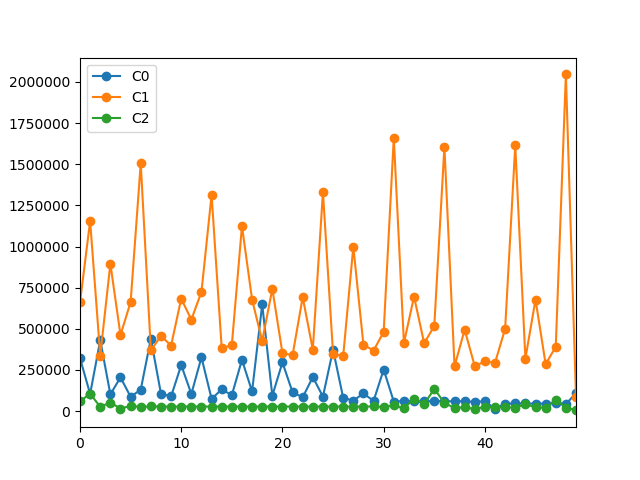

In [21]:
# Visualização dos centróides nos ciclos.
%matplotlib notebook
df_centroides.plot(marker='o')

In [22]:
# DF para identificação dos centroides
df_labels = pd.DataFrame(index = df_ts_data.T.index)
df_labels['Grupo'] = model.labels_

In [23]:
# Distribuição dos 329 produtos nos 3 grupos
df_labels['Grupo'].value_counts()

2    282
0     42
1      5
Name: Grupo, dtype: int64

In [24]:
df_labels.to_csv('df_grupo.csv')

In [25]:
df_centroides.describe()

,C0,C1,C2
count,50.000000,5.000000e+01,50.000000
mean,139448.334752,6.564671e+05,33187.501630
std,130529.100850,4.425349e+05,22051.969459
min,14099.937143,8.863283e+04,4273.852866
25%,60103.928571,3.681423e+05,24911.403498
50%,88830.137205,4.718552e+05,27670.620567
75%,131528.129464,7.175370e+05,28112.028290
max,648176.659091,2.045989e+06,135570.237687


# FEATURE ENGINEERING

Aqui, iremos criar algumas features a partir das já existentes.

In [26]:
new_df.head(2)

,COD_MATERIAL,COD_CICLO,DES_CATEGORIA_MATERIAL,DES_MARCA_MATERIAL,FLG_DATA,FLG_CAMPANHA_MKT_A,FLG_CAMPANHA_MKT_B,FLG_CAMPANHA_MKT_C,FLG_CAMPANHA_MKT_D,PCT_DESCONTO,VL_PRECO,QT_VENDA
18517,153066,201801,anon_S12,anon_S22,0,0.0,1.0,0.5,0.0,21.64,632.610,892635.0
29332,420294,201801,anon_S2,anon_S24,0,0.0,0.0,0.0,0.0,NaN,326.565,18576.0


Inicialmente, iríamos transformar as variáveis categóricas DES_CATEGORIA_MATERIAL e DES_MARCA_MATERIAL e variáveis númericas onde em cada ciclo iria apresentar o percentual de produtos pertencentes aquela categoria/marca, porém identificamos que essas variáveis não apresentam variação de cartegorias/marcas por ciclo, por isso iremos eliminá-las da base.

In [27]:
new_df[['COD_CICLO','DES_CATEGORIA_MATERIAL']].groupby(['COD_CICLO','DES_CATEGORIA_MATERIAL'])['DES_CATEGORIA_MATERIAL'].count()

COD_CICLO  DES_CATEGORIA_MATERIAL
201801     anon_S11                  42
           anon_S12                  88
           anon_S18                  18
           anon_S2                   82
           anon_S30                  14
                                     ..
202101     anon_S12                  88
           anon_S18                  18
           anon_S2                   82
           anon_S30                  14
           anon_S5                   85
Name: DES_CATEGORIA_MATERIAL, Length: 318, dtype: int64

In [28]:
new_df[['COD_CICLO','DES_MARCA_MATERIAL']].groupby(['COD_CICLO','DES_MARCA_MATERIAL'])['DES_MARCA_MATERIAL'].count()

COD_CICLO  DES_MARCA_MATERIAL
201801     anon_S13               8
           anon_S14               8
           anon_S15              10
           anon_S16               2
           anon_S17              11
                                 ..
202101     anon_S42               1
           anon_S47               1
           anon_S6               13
           anon_S8               63
           anon_S9               15
Name: DES_MARCA_MATERIAL, Length: 1431, dtype: int64

## Agrupando dados 

Iremos utilizar a média para agrupar as variáveis que representam indicadores, sendo assim cada variável trará a informação do percentual de produtos (pertencentes aos mesmo grupo) que utilizaram a campanha X naquele ciclo específico. Já a variável FLG_DATA continuará como indicador já que independente do produto, as datas comemorativas continuarão presentes (ou não) nos ciclos. Para as variáveis numéricas PCT_DESCONTO e VL_PRECO, iremos extrair os valores Médios, Mínimos e Máximos, pois a média sozinha pode não ser capaz de representar um grupo todo, pois a mesma é sensível a outliers, então resolvemos extrair os valores max e min para trazer informações sobre a variação da variável em questão.

In [29]:
from utils import agrupando_dados
df_centroides = df_centroides.join(agrupando_dados(new_df,df_labels),how='right')

In [30]:
df_centroides.head()

,C0,C1,C2,C0_COD_CICLO_ANO,C0_COD_CICLO,C0_FLG_DATA_mean,C0_FLG_CAMPANHA_MKT_A_mean,C0_FLG_CAMPANHA_MKT_B_mean,C0_FLG_CAMPANHA_MKT_C_mean,C0_FLG_CAMPANHA_MKT_D_mean,...,C1_FLG_CAMPANHA_MKT_A_mean,C1_FLG_CAMPANHA_MKT_B_mean,C1_FLG_CAMPANHA_MKT_C_mean,C1_FLG_CAMPANHA_MKT_D_mean,C1_PCT_DESCONTO_mean,C1_PCT_DESCONTO_min,C1_PCT_DESCONTO_max,C1_VL_PRECO_mean,C1_VL_PRECO_min,C1_VL_PRECO_max
0,322088.520833,6.600530e+05,59533.658692,2018,1,0,0.0,0.833333,0.285714,0.023810,...,0.0,0.6,0.1,0.0,13.880000,10.00,21.640,739.335,563.745,1013.385
1,103940.186747,1.155111e+06,105404.565605,2018,2,0,0.0,0.976190,0.523810,0.000000,...,0.0,0.8,0.6,0.0,15.558750,9.24,21.860,729.834,491.490,941.475
2,431131.404255,3.378333e+05,26264.006390,2018,3,0,0.0,0.416667,0.214286,0.190476,...,0.0,0.4,0.0,0.0,17.000000,9.00,22.000,748.503,532.680,991.965
3,101606.426471,8.950603e+05,51733.471132,2018,4,0,0.0,0.452381,0.000000,0.017857,...,0.0,0.5,0.0,0.0,17.591667,11.00,21.135,736.920,563.040,980.445
4,204862.112903,4.623075e+05,15656.871250,2018,5,0,0.0,0.285714,0.285714,0.023810,...,0.0,0.2,0.2,0.0,11.550000,11.55,11.550,764.940,563.400,923.790


In [31]:
# DF com todos os centróides e as respectivas variáveis independentes após feature engineering
df_centroides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 42 columns):
C0                            50 non-null float64
C1                            50 non-null float64
C2                            50 non-null float64
C0_COD_CICLO_ANO              53 non-null int64
C0_COD_CICLO                  53 non-null int64
C0_FLG_DATA_mean              53 non-null int64
C0_FLG_CAMPANHA_MKT_A_mean    53 non-null float64
C0_FLG_CAMPANHA_MKT_B_mean    53 non-null float64
C0_FLG_CAMPANHA_MKT_C_mean    53 non-null float64
C0_FLG_CAMPANHA_MKT_D_mean    53 non-null float64
C0_PCT_DESCONTO_mean          53 non-null float64
C0_PCT_DESCONTO_min           53 non-null float64
C0_PCT_DESCONTO_max           53 non-null float64
C0_VL_PRECO_mean              53 non-null float64
C0_VL_PRECO_min               53 non-null float64
C0_VL_PRECO_max               53 non-null float64
C2_COD_CICLO_ANO              53 non-null int64
C2_COD_CICLO                  53 non-null int64
C2_FLG_

Após feature engineering, podemos verificar que as variáveis C1_PCT_DESCONTO_mean, C1_PCT_DESCONTO_min, C1_PCT_DESCONTO_max, o que significa que no Grupo 1 existem ciclos com valores NULL... Como temos poucos data points na base de dados, iremos preencher esses valores com a média da variável.

In [32]:
for i in ['C1_PCT_DESCONTO_mean','C1_PCT_DESCONTO_min','C1_PCT_DESCONTO_max']:
    df_centroides[i].fillna(df_centroides[i].mean(),inplace=True)

In [33]:
df_centroides.loc[:,df_centroides.columns.str.contains('C1')]

,C1,C1_COD_CICLO_ANO,C1_COD_CICLO,C1_FLG_DATA_mean,C1_FLG_CAMPANHA_MKT_A_mean,C1_FLG_CAMPANHA_MKT_B_mean,C1_FLG_CAMPANHA_MKT_C_mean,C1_FLG_CAMPANHA_MKT_D_mean,C1_PCT_DESCONTO_mean,C1_PCT_DESCONTO_min,C1_PCT_DESCONTO_max,C1_VL_PRECO_mean,C1_VL_PRECO_min,C1_VL_PRECO_max
0,6.600530e+05,2018,1,0,0.0,0.6,0.1,0.00,13.880000,10.00000,21.6400,739.335,563.745,1013.385
1,1.155111e+06,2018,2,0,0.0,0.8,0.6,0.00,15.558750,9.24000,21.8600,729.834,491.490,941.475
2,3.378333e+05,2018,3,0,0.0,0.4,0.0,0.00,17.000000,9.00000,22.0000,748.503,532.680,991.965
3,8.950603e+05,2018,4,0,0.0,0.5,0.0,0.00,17.591667,11.00000,21.1350,736.920,563.040,980.445
4,4.623075e+05,2018,5,0,0.0,0.2,0.2,0.00,11.550000,11.55000,11.5500,764.940,563.400,923.790
5,6.622290e+05,2018,6,0,0.0,0.4,0.0,0.10,11.090000,0.00000,18.2100,731.589,503.835,1011.750
6,1.505412e+06,2018,7,1,0.0,0.2,0.0,0.05,31.272500,31.27250,31.2725,754.254,561.495,1013.400
7,3.698712e+05,2018,8,0,0.0,0.2,0.0,0.20,5.383333,0.00000,16.1500,758.895,563.400,1010.565
8,4.559652e+05,2018,9,1,0.0,0.0,0.0,0.30,0.000000,0.00000,0.0000,769.236,543.525,1013.340
9,3.986292e+05,2018,10,0,0.0,0.0,0.0,0.10,0.000000,0.00000,0.0000,761.964,563.130,1013.400


# Existe indícios de correlação entre as variáveis?

In [34]:
# cálculo da correlação de spearman entre as variáveis do grupo 0
corr = df_centroides.loc[:,df_centroides.columns.str.contains('C0')].corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,C0,C0_COD_CICLO_ANO,C0_COD_CICLO,C0_FLG_DATA_mean,C0_FLG_CAMPANHA_MKT_A_mean,C0_FLG_CAMPANHA_MKT_B_mean,C0_FLG_CAMPANHA_MKT_C_mean,C0_FLG_CAMPANHA_MKT_D_mean,C0_PCT_DESCONTO_mean,C0_PCT_DESCONTO_min,C0_PCT_DESCONTO_max,C0_VL_PRECO_mean,C0_VL_PRECO_min,C0_VL_PRECO_max
C0,1,-0.71,-0.14,0.058,0.15,0.16,0.23,0.11,0.083,-0.29,0.2,-0.43,-0.0027,-0.49
C0_COD_CICLO_ANO,-0.71,1,-0.093,-0.0072,-0.1,-0.19,-0.38,-0.24,0.17,0.54,-0.14,0.59,-0.11,0.57
C0_COD_CICLO,-0.14,-0.093,1,0.36,-0.079,-0.071,-0.024,0.25,-0.083,-0.16,-0.095,0.22,0.16,0.24
C0_FLG_DATA_mean,0.058,-0.0072,0.36,1,0.034,-0.42,-0.036,0.027,-0.26,-0.14,-0.31,0.39,0.26,0.25
C0_FLG_CAMPANHA_MKT_A_mean,0.15,-0.1,-0.079,0.034,1,0.042,-0.039,0.15,-0.027,-0.083,0.099,-0.26,0.15,-0.032
C0_FLG_CAMPANHA_MKT_B_mean,0.16,-0.19,-0.071,-0.42,0.042,1,0.33,-0.065,0.17,-0.095,0.44,-0.65,-0.26,-0.34
C0_FLG_CAMPANHA_MKT_C_mean,0.23,-0.38,-0.024,-0.036,-0.039,0.33,1,-0.061,-0.12,-0.37,0.06,-0.41,-0.076,-0.27
C0_FLG_CAMPANHA_MKT_D_mean,0.11,-0.24,0.25,0.027,0.15,-0.065,-0.061,1,0.086,-0.17,0.29,-0.31,0.025,-0.11
C0_PCT_DESCONTO_mean,0.083,0.17,-0.083,-0.26,-0.027,0.17,-0.12,0.086,1,0.67,0.55,-0.25,-0.19,-0.033
C0_PCT_DESCONTO_min,-0.29,0.54,-0.16,-0.14,-0.083,-0.095,-0.37,-0.17,0.67,1,0.3,0.19,-0.21,0.25


Aqui, iremos eliminar a variável C1_FLG_CAMPANHA_MKT_A_mean pois a mesma não possui variação entre os ciclos.

In [35]:
df_centroides = df_centroides.drop('C1_FLG_CAMPANHA_MKT_A_mean',axis=1)

In [36]:
# cálculo da correlação de spearman entre as variáveis do grupo 1
corr = df_centroides.loc[:,df_centroides.columns.str.contains('C1')].corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,C1,C1_COD_CICLO_ANO,C1_COD_CICLO,C1_FLG_DATA_mean,C1_FLG_CAMPANHA_MKT_B_mean,C1_FLG_CAMPANHA_MKT_C_mean,C1_FLG_CAMPANHA_MKT_D_mean,C1_PCT_DESCONTO_mean,C1_PCT_DESCONTO_min,C1_PCT_DESCONTO_max,C1_VL_PRECO_mean,C1_VL_PRECO_min,C1_VL_PRECO_max
C1,1,-0.27,0.071,0.049,0.35,0.2,0.038,0.13,0.021,0.36,-0.42,-0.04,-0.095
C1_COD_CICLO_ANO,-0.27,1,-0.093,-0.0072,-0.11,-0.19,-0.15,0.26,0.28,0.12,0.66,0.4,0.72
C1_COD_CICLO,0.071,-0.093,1,0.36,-0.16,0.086,0.17,-0.14,-0.17,-0.068,0.26,0.062,0.29
C1_FLG_DATA_mean,0.049,-0.0072,0.36,1,-0.31,-0.072,0.065,-0.09,-0.012,-0.22,0.34,0.25,0.27
C1_FLG_CAMPANHA_MKT_B_mean,0.35,-0.11,-0.16,-0.31,1,0.33,-0.12,0.12,-0.1,0.31,-0.53,-0.43,-0.17
C1_FLG_CAMPANHA_MKT_C_mean,0.2,-0.19,0.086,-0.072,0.33,1,-0.075,-0.07,-0.021,0.014,-0.21,-0.17,-0.15
C1_FLG_CAMPANHA_MKT_D_mean,0.038,-0.15,0.17,0.065,-0.12,-0.075,1,-0.17,-0.36,0.21,-0.3,-0.4,-0.15
C1_PCT_DESCONTO_mean,0.13,0.26,-0.14,-0.09,0.12,-0.07,-0.17,1,0.88,0.64,-0.039,-0.073,0.18
C1_PCT_DESCONTO_min,0.021,0.28,-0.17,-0.012,-0.1,-0.021,-0.36,0.88,1,0.32,0.19,0.19,0.21
C1_PCT_DESCONTO_max,0.36,0.12,-0.068,-0.22,0.31,0.014,0.21,0.64,0.32,1,-0.33,-0.29,0.032


In [37]:
# cálculo da correlação de spearman entre as variáveis do grupo 2
corr = df_centroides.loc[:,df_centroides.columns.str.contains('C2')].corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,C2,C2_COD_CICLO_ANO,C2_COD_CICLO,C2_FLG_DATA_mean,C2_FLG_CAMPANHA_MKT_A_mean,C2_FLG_CAMPANHA_MKT_B_mean,C2_FLG_CAMPANHA_MKT_C_mean,C2_FLG_CAMPANHA_MKT_D_mean,C2_PCT_DESCONTO_mean,C2_PCT_DESCONTO_min,C2_PCT_DESCONTO_max,C2_VL_PRECO_mean,C2_VL_PRECO_min,C2_VL_PRECO_max
C2,1,-0.31,-0.075,-0.052,0.11,0.48,0.15,0.2,-0.16,-0.31,0.21,-0.53,-0.43,-0.32
C2_COD_CICLO_ANO,-0.31,1,-0.093,-0.0072,-0.17,-0.46,-0.34,-0.16,0.22,0.54,-0.11,0.63,0.15,0.72
C2_COD_CICLO,-0.075,-0.093,1,0.36,0.44,-0.09,-0.011,0.21,-0.084,-0.19,-0.029,0.17,0.38,0.1
C2_FLG_DATA_mean,-0.052,-0.0072,0.36,1,0.29,-0.37,0.011,0.026,-0.26,-0.18,-0.14,0.31,0.22,0.31
C2_FLG_CAMPANHA_MKT_A_mean,0.11,-0.17,0.44,0.29,1,0.074,0.42,0.13,-0.18,-0.45,0.16,-0.05,0.21,-0.06
C2_FLG_CAMPANHA_MKT_B_mean,0.48,-0.46,-0.09,-0.37,0.074,1,0.17,0.14,0.082,-0.3,0.34,-0.74,-0.34,-0.45
C2_FLG_CAMPANHA_MKT_C_mean,0.15,-0.34,-0.011,0.011,0.42,0.17,1,0.046,-0.31,-0.34,0.056,-0.28,0.0086,-0.35
C2_FLG_CAMPANHA_MKT_D_mean,0.2,-0.16,0.21,0.026,0.13,0.14,0.046,1,0.21,-0.17,0.099,-0.36,0.028,-0.11
C2_PCT_DESCONTO_mean,-0.16,0.22,-0.084,-0.26,-0.18,0.082,-0.31,0.21,1,0.31,0.33,-0.15,-0.29,-0.046
C2_PCT_DESCONTO_min,-0.31,0.54,-0.19,-0.18,-0.45,-0.3,-0.34,-0.17,0.31,1,-0.076,0.3,0.054,0.26


Iremos apenas eliminar variáveis independentes que tiverem correlação maior que 0.8 ou menor que -0.8 para evitar multicolinearidade.

Importante também destacar as variáveis com correlação alta com as variáveis dependentes de cada grupo.

In [38]:
df_centroides = df_centroides.drop('C1_PCT_DESCONTO_min',axis=1)

In [39]:
df_centroides.to_csv('df_centroides.csv',index=False)